In [1]:
!pip install pandas-datareader

^C


In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [4]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 11, 11)

df = web.DataReader("TSLA", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-05,440.000000,424.000000,428.299988,438.089996,28414500.0,438.089996
2020-11-06,436.570007,424.279999,436.100006,429.950012,21706000.0,429.950012
2020-11-09,452.500000,421.000000,439.500000,421.260010,34833000.0,421.260010
2020-11-10,420.089996,396.029999,420.089996,410.359985,30284200.0,410.359985
2020-11-11,418.700012,410.579987,416.450012,417.130005,17357700.0,417.130005


In [13]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
2020-01-10           NaN
2020-01-13           NaN
2020-01-14           NaN
2020-01-15           NaN
2020-01-16           NaN
2020-01-17           NaN
2020-01-21           NaN
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-27           NaN
2020-01-28           NaN
2020-01-29           NaN
2020-01-30           NaN
2020-01-31           NaN
2020-02-03           NaN
2020-02-04           NaN
2020-02-05           NaN
2020-02-06           NaN
2020-02-07           NaN
2020-02-10           NaN
2020-02-11           NaN
2020-02-12           NaN
2020-02-13           NaN
                 ...    
2020-10-01    294.699119
2020-10-02    297.231199
2020-10-05    299.906079
2020-10-06    302.439219
2020-10-07    305.093879
2020-10-08    307.725819
2020-10-09    310.449799
2020-10-12    313.241679
2020-10-13    316.05

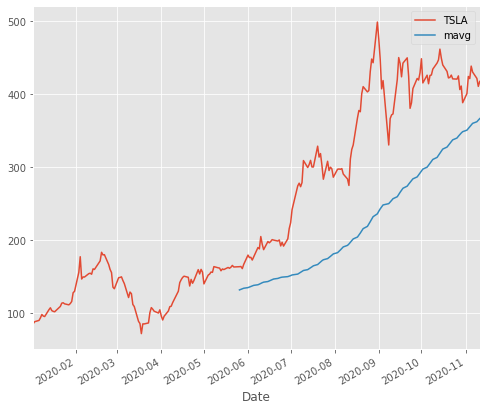

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

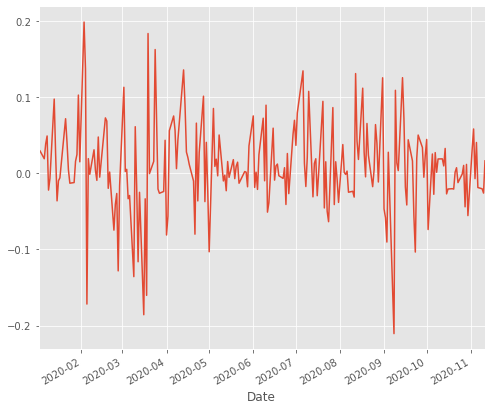

In [16]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')


In [23]:
dfcomp = web.DataReader(['FB', 'AAPL', 'AMZN', 'TSLA', 'GOOG'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,AMZN,FB,GOOG,TSLA
Date,,,,,
2020-11-05,118.824997,3322.000000,294.679993,1763.369995,438.089996
2020-11-06,118.690002,3311.370117,293.410004,1761.750000,429.950012
2020-11-09,116.320000,3143.739990,278.769989,1763.000000,421.260010
2020-11-10,115.970001,3035.020020,272.429993,1740.390015,410.359985
2020-11-11,119.489998,3137.389893,276.480011,1752.709961,417.130005


In [27]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr.tail()

Symbols,AAPL,AMZN,FB,GOOG,TSLA
Symbols,,,,,
AAPL,1.000000,0.707393,0.779934,0.764129,0.508836
AMZN,0.707393,1.000000,0.686496,0.685536,0.481102
FB,0.779934,0.686496,1.000000,0.806978,0.415406
GOOG,0.764129,0.685536,0.806978,1.000000,0.474088
TSLA,0.508836,0.481102,0.415406,0.474088,1.000000


Text(0, 0.5, 'Returns TSLA')

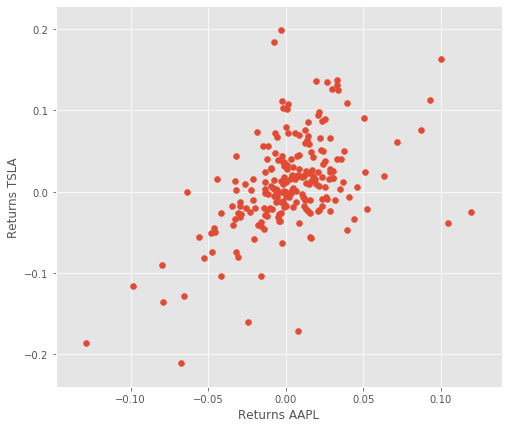

In [32]:
plt.scatter(retscomp.AAPL, retscomp.TSLA)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns TSLA")

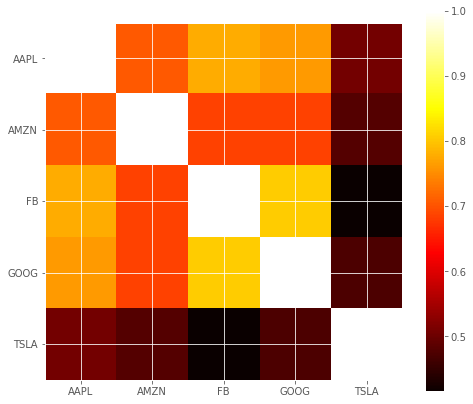

In [35]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

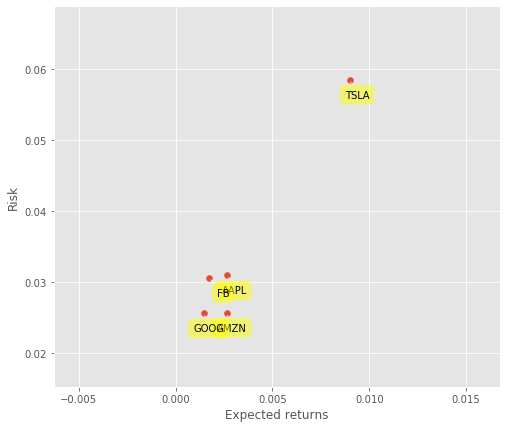

In [36]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))